In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
#x1   y1    x2   y2  v1x  v1y  v2x  v2y

def myfun(t, u):
    f = np.zeros((8,))
    f[0] = u[4]
    f[1] = u[5]
    f[2] = u[6]
    f[3] = u[7]
    R1 = np.sqrt((u[0]**2 + u[1]**2))
    R2 = np.sqrt(u[2]**2 + u[3]**2)
    dx = u[0] - u[2]
    dy = u[1] - u[3]
    R12 = np.sqrt(dx**2 + dy**2)
    q1 = -G*Ms/(R1**3)
    q2 = -G*Ms/(R2**3)
    q12 = -G*Mp2/(R12**3)
    q21 = -G*Mp1/(R12**3)
    f[4] = q1*u[0] + q12*dx
    f[5] = q1*u[1] + q12*dy
    f[6] = q2*u[2] - q21*dx
    f[7] = q2*u[3] - q21*dy
    return f

In [3]:
G = 6.67e-11 # m3 * kg-1 * s-2
Ms = 1.98e30 # mass sun in kg
Re = 150e9 #km distance between sun and earth
Mp1 = 0.001*Ms # mass planet 1
Mp2 = Mp1
Rp1 = Re
Rp2 = 0.95 * Rp1

# keplers law
k = 4*(np.pi**2)/ ( G*Ms) #constant of proportionality
Pp1 = np.sqrt(k*(Rp1**3))
Pp2 = np.sqrt(k*(Rp2**3)) #period of planet 2
Vp1 = (2*np.pi*Rp1)/Pp1 #orbital velocity planet 1
Vp2 = (2*np.pi*Rp2)/Pp2 #orbital velocity planet 2


In [4]:
#u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
#x1   y1    x2   y2  v1x  v1y  v2x  v2y

#new case of planet 1 starting at 5 degrees from horizontal
#new case of planet 2 starting at 10 degrees from horizontal

u0 = np.zeros((8,))
u0[0] = Rp1*np.cos(0.087)
u0[1] = Rp1*np.sin(0.087)
u0[2] = Rp2*np.cos(0.174)
u0[3] = Rp2*np.sin(0.174)
u0[4] = 0
u0[5] = Vp1
u0[6] = 0
u0[7] = -Vp2

In [5]:
Dt = 360
t0 = 0
tmax = 20*Pp1
t = np.arange(t0, tmax,Dt)

In [6]:
from scipy.integrate import solve_ivp
sol = solve_ivp(myfun, [t0,tmax], u0, method='DOP853', t_eval=t)

Text(0, 0.5, 'y (km)')

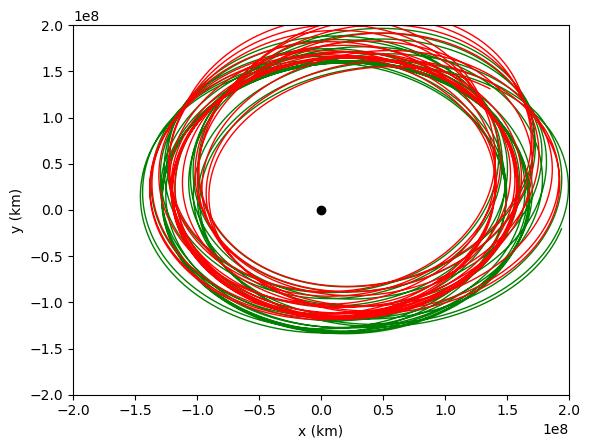

In [7]:
#plot the orgins in the x,y plane

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
plt.plot(sol.y[0]/1000, sol.y[1]/1000, 'g-', lw=1) #planet 1
plt.plot(sol.y[2]/1000, sol.y[3]/1000, 'r-', lw=1)
plt.xlabel('x (km)')
plt.ylabel('y (km)')

Text(0.5, 0, 'time (s)')

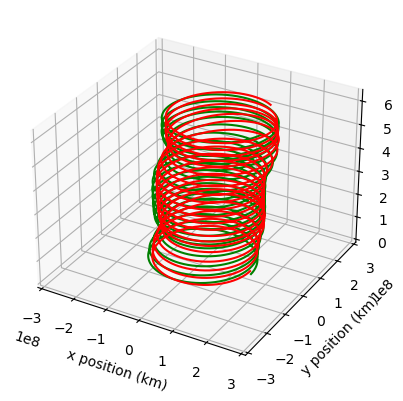

In [8]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlim((-3e8, 3e8))
ax1.set_ylim((-3e8, 3e8))
ax1.set_zlim((t0, tmax))
ax1.plot(sol.y[0]/1000, sol.y[1]/1000, sol.t, 'g-') #planet 1
ax1.plot(sol.y[2]/1000, sol.y[3]/1000, sol.t, 'r-') # planet 2
ax1.set_xlabel('x position (km)')
ax1.set_ylabel('y position (km)') 
ax1.set_zlabel('time (s)')

Text(0, 0.5, 'Orbital Radius, R (km)')

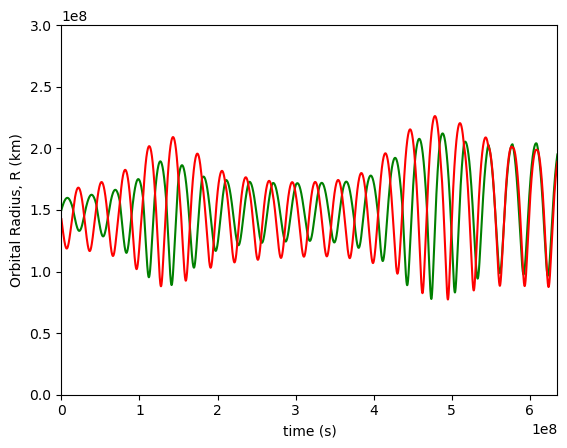

In [9]:
# sun-planet distance

Rad1 = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
Rad2 = np.sqrt(sol.y[2]**2 + sol.y[3]**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 3e8])
plt.plot(t,Rad1/1000, 'g-')
plt.plot(t,Rad2/1000, 'r-')
plt.xlabel('time (s)')
plt.ylabel('Orbital Radius, R (km)')


Text(0, 0.5, 'Planetary distance, R12 (km)')

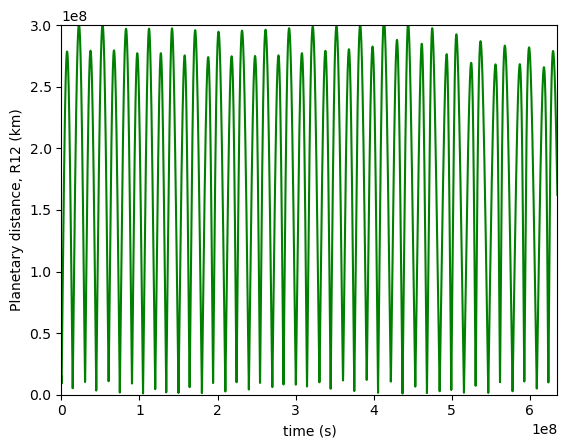

In [10]:
# plot the interplanet difference 
delx = sol.y[0] - sol.y[2]
dely = sol.y[1] - sol.y[3]

Rad12 = np.sqrt(delx**2 + dely**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, 3e8])
plt.plot(t,Rad12/1000, 'g-')
plt.xlabel('time (s)')
plt.ylabel('Planetary distance, R12 (km)')

Text(0, 0.5, 'Planetary Velocity (m/s)')

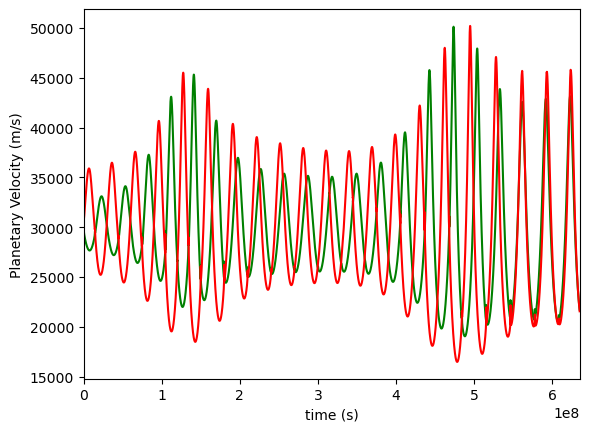

In [11]:
# plot the velocities 

velop1 = np.sqrt(sol.y[4]**2 + sol.y[5]**2)
velop2 = np.sqrt(sol.y[6]**2 + sol.y[7]**2)

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
#plt.axis( [t0,tmax, 0, 3e8])
ax.set_xlim([t0,tmax])
plt.plot(t,velop1, 'g-')
plt.plot(t,velop2, 'r-')

plt.xlabel('time (s)')
plt.ylabel('Planetary Velocity (m/s)')

In [12]:
from matplotlib import animation


In [13]:
N, = np.shape(sol.t)
Nframes = 800
Nskip = int(N/Nframes)
print(N)
print(Nframes)
print(Nskip)

1764611
800
2205


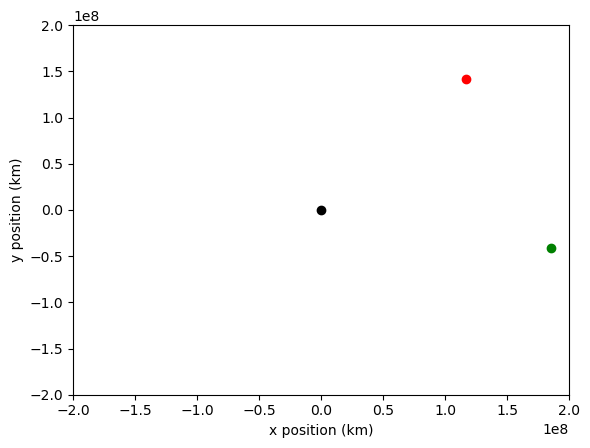

In [14]:
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return (line1,line2)

def animate(i):
    xp1 = sol.y[0][i*Nskip]/1000
    yp1 = sol.y[1][i*Nskip]/1000
    xp2 = sol.y[2][i*Nskip]/1000
    yp2 = sol.y[3][i*Nskip]/1000
    line1.set_data([xp1],[yp1])
    line2.set_data([xp2],[yp2])
    return (line1,line2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, 
                               interval=100, blit=True)

f = "planetanimation.gif"
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)
    
